<!-- # <span style="color:#FFFFFF; font-size: 0%;">1 | Introduction</span>
<div style="border-radius: 0px; background-color: #112241; text-align:center;">
    <h4 style="color: white; padding: 1.5rem; font-size: 19px"><b>1 | INTRODUCTION</b></h4>
</div>
<!-- <br> -->

<div style="display: flex; flex-direction: row; align-items: center;">
    <div style="flex : 0; margin-top: 12px;">
        <img src="https://media.licdn.com/dms/image/D4D22AQFt6ex8xe2vMw/feedshare-shrink_1280/0/1707934689036?e=1710979200&v=beta&t=y6L1IxcYeY0P7KiKEAzxaerJMznjyQPUk-zl0eD5hwI" alt="Image" style="max-width: 330px; max-height:400px;" />
    </div>
    <div style="flex: 1; margin-left: 30px;color:darkblue; margin-top: 6px">
        <h1><b>Cat vs Dog Classifier Using Transfer Learning Xception PreTrained Model | Accuracy 0.99</b></h1>

Hello! I'm <h3><b>Muhammad Abdullah</b></h3>  A  Junior Data Scientist. 
This notebook explores training <b>CNN models with transfer learning</b>, specifically leveraging Xception. By adapting pre-learned features from <b>ImageNet,</b> it efficiently addresses small dataset challenges, yielding accurate predictions. This approach optimizes computational resources while enhancing model performance for diverse classification tasks. If you find this nugget of knowledge valuable, an **upvote** would be much appreciated! 🚀❤️
    </div>
</div>



# <p style="font-family:newtimeroman;font-size:100%;text-align:center;color:darkblue;">Aims</p>
***In this notebook, I aim to train convolutional neural network (CNN) models using transfer learning. Given a small dataset, utilizing a pre-trained model like Xception is advantageous due to its ability to leverage knowledge learned from the ImageNet dataset, which consists of 1000 different classes. Transfer learning allows us to take advantage of features learned by the pre-trained model and adapt them to our specific classification problem, mitigating the data hunger typically associated with deep learning models. Xception, known for its deep architecture and efficient utilization of parameters, offers a robust foundation for classification tasks, especially with limited data. By fine-tuning its weights on our dataset, we can achieve efficient and accurate predictions. Transfer learning with Xception is a prudent choice for classification tasks where datasets are small, as it harnesses the representation power of a large, diverse dataset like ImageNet while requiring fewer training examples. This approach not only enhances model performance but also optimizes computational resources, making it a suitable solution for various classification challenges.***

# <p style="font-family:newtimeroman;font-size:180%;text-align:center;color:darkblue;">Importing Libraries</p>

In [54]:
#Checking GPU Support
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [50]:
#Import Os and Basis Libraries
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
#Matplot Images
import matplotlib.image as mpimg
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
# import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam
#PreTrained Model VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import Xception
#Image Generator DataAugmentation
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Warnings Remove 
import warnings 
warnings.filterwarnings("ignore")

# <p style="font-family:newtimeroman;font-size:200%;text-align:center;color:darkblue;">Loading Data</p>


In [51]:
# Directory containing the "Train" folder
directory = "archive"

# List of categories (subfolder names)
categories = ["cats", "dogs"]

# Initialize lists to store filenames and categories
filenames = []
category_labels = []

# Iterate through the categories
for category in categories:
    # Path to the current category folder
    category_folder = os.path.join(directory, "train", category)
    # List all filenames in the category folder
    category_filenames = os.listdir(category_folder)
    # Append filenames and corresponding category labels
    filenames.extend(category_filenames)
    category_labels.extend([category] * len(category_filenames))

# Create DataFrame
df = pd.DataFrame({
    'filename': filenames,
    'category': category_labels
})

# Display the first few rows of the DataFrame
print(df.head())

        filename category

0      cat.0.jpg     cats

1      cat.1.jpg     cats

2    cat.100.jpg     cats

3   cat.1000.jpg     cats

4  cat.10002.jpg     cats


###### **<h1 align="center"><span style="color:darkblue;">Pie Chart</span>**

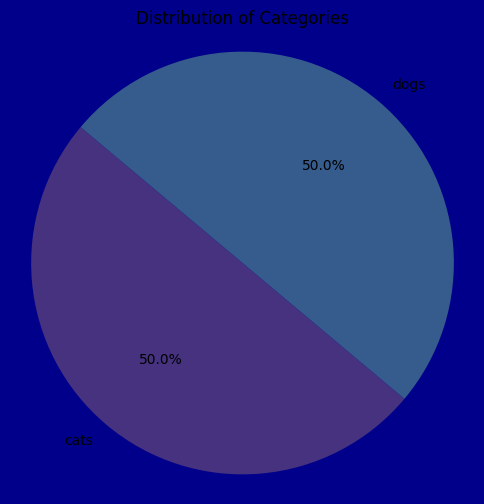

In [41]:
# Count the occurrences of each category in the 'category' column
count = df['category'].value_counts()

# Create a pie chart using Seaborn
plt.figure(figsize=(6, 6) , facecolor='darkblue')
palette = sns.color_palette("viridis")
sns.set_palette(palette)
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories') 
plt.axis('equal') 

plt.show()  # Show the plot

***Yes Both Classes Are Perfectly Balanced***

# <p style="font-family:newtimeroman;font-size:200%;text-align:center;color:darkblue;">Visualize Images</p>


###### **<h1 align="center"><span style="color:darkblue;">Cats</span>**
***Visualizing Some Images of Cat From Folder*** 

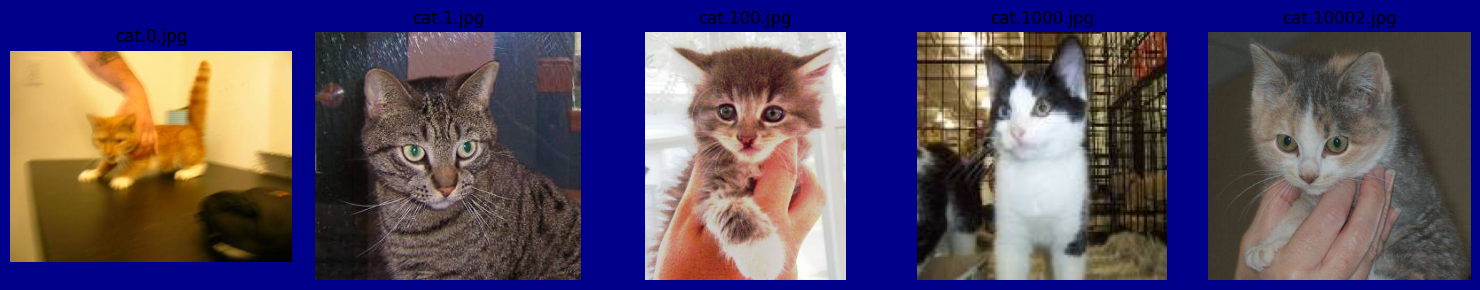

In [10]:
def visualize_images(path, num_images=5):
    # Get a list of image filenames in the specified path
    image_filenames = os.listdir(path)
    
    # Limit the number of images to visualize if there are more than num_images
    num_images = min(num_images, len(image_filenames))
    
    # Create a figure and axis object to display images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3),facecolor='darkblue')
    
    # Iterate over the selected images and display them
    for i, image_filename in enumerate(image_filenames[:num_images]):
        # Load the image using Matplotlib
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)
        
        # Display the image
        axes[i].imshow(image)
        axes[i].axis('off')  # Turn off axis
        axes[i].set_title(image_filename)  # Set image filename as title
    
    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()

# Specify the path containing the images to visualize
path_to_visualize = "archive/train/cats"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

###### **<h1 align="center"><span style="color:darkblue;">Dogs</span>**
***Visualizing Some Images of Dogs From Folder*** 

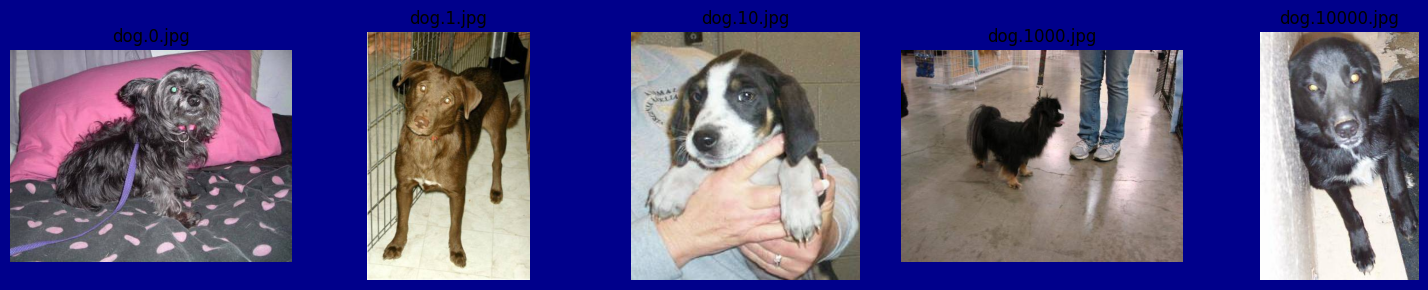

In [11]:
# Specify the path containing the images to visualize
path_to_visualize = "archive/train/dogs" 

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

# <p style="font-family:newtimeroman;font-size:200%;text-align:center;color:darkblue;">Data Augmentation</p>


***Data augmentation is a technique used to generate additional data from a limited dataset. It plays a crucial role in machine learning and deep learning applications. By applying various transformations to the existing data, such as rotation, scaling, flipping, or adding noise, data augmentation effectively expands the dataset, thereby enhancing model performance and generalization.***

***When using flow_from_directory with data augmentation, the generator generates augmented images on-the-fly during training epochs. This means that the original images in your directory are not physically modified or increased in number; instead, the generator generates new augmented images each time a batch is requested during training.***

In [12]:
#Data_Dir
data_dir = 'archive/train'

# Defining data generator with Data Augmentation
data_gen_augmented = ImageDataGenerator(rescale = 1/255., 
                                        validation_split = 0.2,
                                        zoom_range = 0.2,
                                        horizontal_flip= True,
                                        rotation_range = 20,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2)
print('Augmented training Images:')
train_ds = data_gen_augmented.flow_from_directory(data_dir, 
                                                              target_size = (224, 224), 
                                                              batch_size = 32,
                                                              subset = 'training',
                                                              class_mode = 'binary')

#Testing Augmented Data
# Defining Validation_generator withour Data Augmentation
data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

print('Unchanged Validation Images:')
validation_ds = data_gen.flow_from_directory(data_dir, 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')

Augmented training Images:

Found 16000 images belonging to 2 classes.

Unchanged Validation Images:

Found 4000 images belonging to 2 classes.


# <p style="font-family:newtimeroman;font-size:200%;text-align:center;color:darkblue;">Model Building</p>


###### **<h1 align="center"><span style="color:darkblue;">Xception as Base Model</span>**
***Xception is a deep convolutional neural network architecture introduced by François Chollet in 2017. It is trained on the ImageNet dataset, which contains over 1.2 million labeled images across 1,000 different classes. The Xception model is characterized by its depth and efficiency, employing a series of depthwise separable convolutions that reduce the number of parameters while maintaining performance. This architecture is inspired by the inception module but replaces standard convolutions with depthwise separable convolutions, resulting in improved efficiency and performance. Xception has demonstrated strong performance in various computer vision tasks, including image classification, object detection, and segmentation.***

In [13]:
# Load the pre-trained Xception model without the top (classification) layer
xception_base = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
xception_base.trainable = False

###### **<h1 align="center"><span style="color:darkblue;">Building Model</span>**

In [14]:
# Build the model
model = Sequential()

# Add the pre-trained Xception base
model.add(xception_base)

# Add global average pooling layer to reduce spatial dimensions
model.add(AveragePooling2D())

# Flatten the feature maps
model.add(Flatten())

# Add a dense layer with 220 units and ReLU activation function
model.add(Dense(220, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))

###### **<h1 align="center"><span style="color:darkblue;">Model Summary</span>**

In [15]:
model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 xception (Functional)       (None, 7, 7, 2048)        20861480  

                                                                 

 average_pooling2d (AverageP  (None, 3, 3, 2048)       0         

 ooling2D)                                                       

                                                                 

 flatten (Flatten)           (None, 18432)             0         

                                                                 

 dense (Dense)               (None, 220)               4055260   

                                                                 

 dense_1 (Dense)             (None, 1)                 221       

                                                                 


Total params: 24,916,961

Trainable params: 4,055,481

Non-trainable params: 20,861,480

_________________

###### **<h1 align="center"><span style="color:darkblue;">Compiling Model</span>**

In [16]:
#Complie
model.compile(loss = BinaryCrossentropy(),
                optimizer = keras.optimizers.RMSprop(learning_rate=0.0001, rho=0.9),
                metrics = ['accuracy'])

###### **<h1 align="center"><span style="color:darkblue;">Fitting Model</span>**

In [17]:
#Early_Stopping
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, 
    restore_best_weights=True,
)

#Fitting Model
history = model.fit(train_ds,
                        epochs= 10,
                        steps_per_epoch = len(train_ds),
                        validation_data = validation_ds,
                        validation_steps = len(validation_ds),
                        callbacks = early_stopping)

Epoch 1/10

500/500 [==============================] - 784s 2s/step - loss: 0.0808 - accuracy: 0.9731 - val_loss: 0.0588 - val_accuracy: 0.9808

Epoch 2/10

500/500 [==============================] - 544s 1s/step - loss: 0.0568 - accuracy: 0.9808 - val_loss: 0.0521 - val_accuracy: 0.9852

Epoch 3/10

500/500 [==============================] - 538s 1s/step - loss: 0.0535 - accuracy: 0.9812 - val_loss: 0.0540 - val_accuracy: 0.9855

Epoch 4/10

500/500 [==============================] - 616s 1s/step - loss: 0.0504 - accuracy: 0.9831 - val_loss: 0.0453 - val_accuracy: 0.9862

Epoch 5/10

500/500 [==============================] - 475s 948ms/step - loss: 0.0442 - accuracy: 0.9851 - val_loss: 0.0558 - val_accuracy: 0.9858

Epoch 6/10

500/500 [==============================] - 637s 1s/step - loss: 0.0438 - accuracy: 0.9853 - val_loss: 0.0530 - val_accuracy: 0.9852

Epoch 7/10

500/500 [==============================] - 773s 2s/step - loss: 0.0451 - accuracy: 0.9851 - val_loss: 0.0515 - val_

# <p style="font-family:newtimeroman;font-size:200%;text-align:center;color:darkblue;">Visualizations Loss and Accuracy</p>


###### **<h1 align="center"><span style="color:darkblue;">Evaluate Model Accuracy</span>**

In [18]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

125/125 [==============================] - 106s 849ms/step - loss: 0.0453 - accuracy: 0.9862

Validation Loss: 0.045325081795454025

Validation Accuracy: 0.9862499833106995


###### **<h1 align="center"><span style="color:darkblue;">Accuracy</span>**

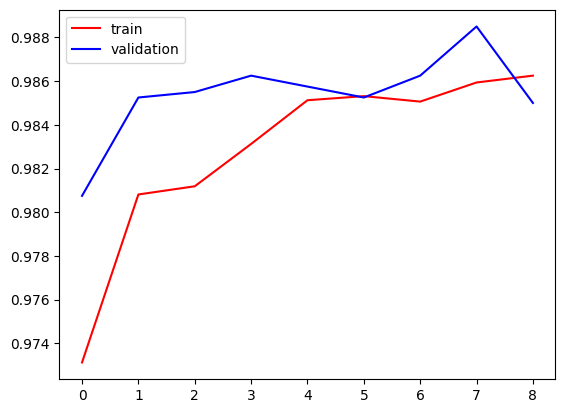

In [19]:
# Accuracy and Val_Accuracy
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

###### **<h1 align="center"><span style="color:darkblue;">Loss</span>**

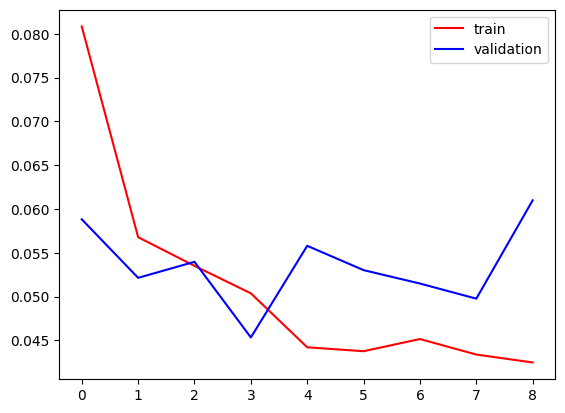

In [20]:
# Loss and Val_Loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# <p style="font-family:newtimeroman;font-size:200%;text-align:center;color:darkblue;">Predictions On Test Data</p>


In [21]:
# Get the class indices assigned by the generators
class_indices_train = train_ds.class_indices

# Print the class indices
print("Class indices for training generator:", class_indices_train)

Class indices for training generator: {'cats': 0, 'dogs': 1}


In [25]:
#Testing Augmented Data
test_dir_path = "archive/test"
# Defining Validation_generator withour Data Augmentation
data_test_gen = ImageDataGenerator(rescale = 1/255.)

print('Test Validation Images:')
test_ds = data_gen.flow_from_directory(test_dir_path, 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')

Test Validation Images:

Found 1000 images belonging to 2 classes.


In [26]:
# Evaluate the model on the validation dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Print the validation loss and accuracy
print("Test Loss:", validation_loss)
print("Test Accuracy:", validation_accuracy)

32/32 [==============================] - 28s 863ms/step - loss: 0.0502 - accuracy: 0.9900

Test Loss: 0.045325081795454025

Test Accuracy: 0.9862499833106995


In [27]:
print(f'Well Our Model is Performing Well On Unseen Data With Accuracy of : {test_accuracy} \n Which is Actually a Good Performence.')

Well Our Model is Performing Well On Unseen Data With Accuracy of : 0.9900000095367432 

 Which is Actually a Good Performence.


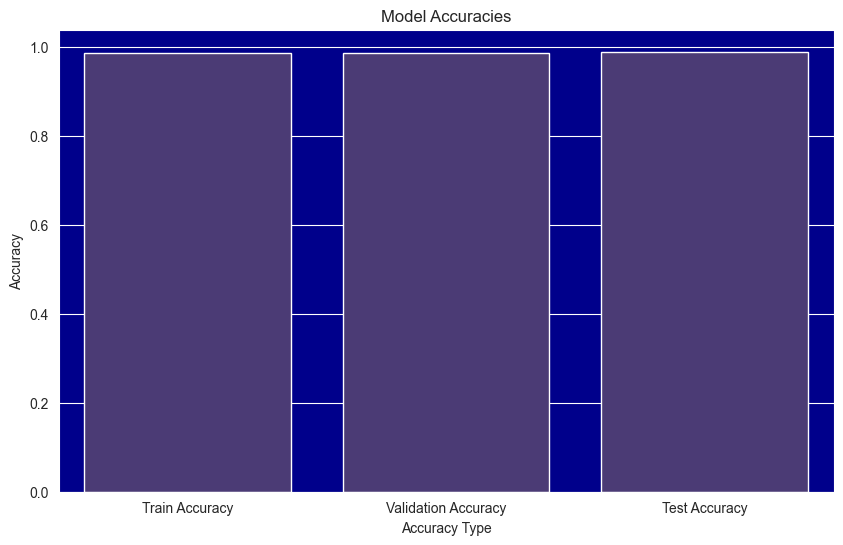

In [49]:
# Initialize the accuracies
acc_train = history.history['accuracy']
val_acc = validation_accuracy
test_acc = test_accuracy

# Create a DataFrame for the accuracies
data = {
    'Accuracy Type': ['Train Accuracy', 'Validation Accuracy', 'Test Accuracy'],
    'Accuracy': [acc_train[-1], val_acc, test_acc]
}
df = pd.DataFrame(data)

# Set the background color
background_color = 'darkblue'

# Set the color palette
palette = 'viridis'

# Set Seaborn style and color palette
sns.set_style("darkgrid")
sns.set_palette(palette)

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Accuracy Type', y='Accuracy', data=df, ci=None)

# Set background color
bar_plot.set_facecolor(background_color)

# Add title and labels
plt.title("Model Accuracies")
plt.xlabel("Accuracy Type")
plt.ylabel("Accuracy")

# Show the plot
plt.show()

# <p style="font-family:newtimeroman;font-size:200%;text-align:center;color:darkblue;">Predictions On Unseen Data</p>


1/1 [==============================] - 0s 50ms/step


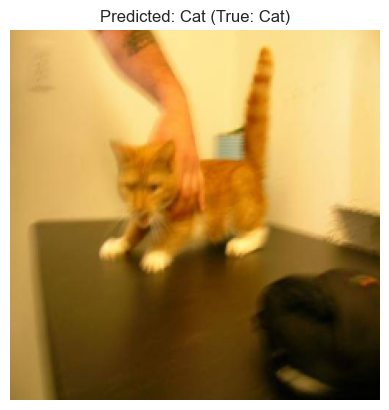

1/1 [==============================] - 0s 31ms/step


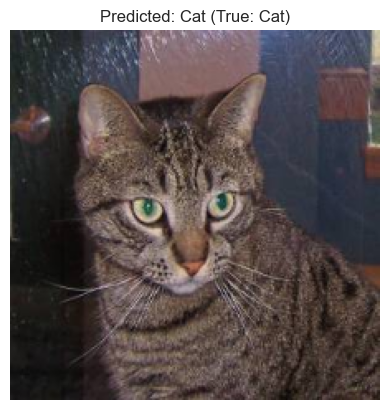

1/1 [==============================] - 0s 35ms/step


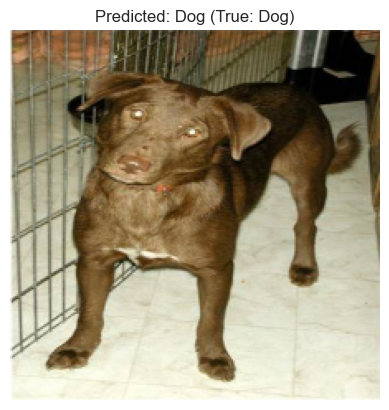

In [48]:
# List of paths to your single images
image_paths = ['archive/train/cats/cat.0.jpg', 'archive/train/cats/cat.1.jpg', 'archive/train/dogs/dog.1.jpg']
# Intialize true labels
true_labels = ['Cat', 'Cat','Dog']

# Load and preprocess each image, make predictions, and display them using a loop
for img_path, true_label in zip(image_paths, true_labels):
    # Load the image using OpenCV
    img = cv2.imread(img_path)
    # Resize the image to (224, 224)
    img = cv2.resize(img, (224, 224)) 

    # Normalize pixel values
    img_array = img.astype(np.float32) / 255.0  

    # Expand the dimensions to match the input shape expected by the model
    img_array = np.expand_dims(img_array, axis=0)

    # Make predictions
    predictions = model.predict(img_array)
    actual_prediction = (predictions > 0.5).astype(int)

    # Display the image with true and predicted labels
    # Convert BGR to RGB for displaying with matplotlib
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
    plt.axis('off')
    if actual_prediction[0][0] == 0:
        predicted_label = 'Cat'
    else:
        predicted_label = 'Dog'
    plt.title(f'Predicted: {predicted_label} (True: {true_label})')
    plt.show()